Name: Aparna Iyer

PRN: 22070126017

Branch: AI-ML A1

Batch: 2022-2026

**Title: K-Means Clustering for 3D and 5D**

**Aim:** To implement and analyze the K-Means clustering algorithm on 3D and 5D feature spaces for image segmentation and feature grouping in Computer Vision applications.

**Objectives:**
1. To understand and apply the K-Means clustering algorithm to multidimensional data.
2. To analyze clustering performance in 3D (RGB color space) and 5D (RGB + spatial coordinates).
3. To visualize and interpret the impact of higher-dimensional feature spaces on clustering.
4. To explore the application of K-Means in image segmentation and pattern recognition.

**Theory:**

K-Means Clustering is an unsupervised machine learning algorithm used for partitioning data into K clusters based on feature similarity. It minimizes intra-cluster variance using the Euclidean distance as a similarity measure.

3D Clustering: When applied to an image, K-Means can be used in RGB color space, grouping pixels based on their color similarities.
5D Clustering: Extending the feature space to include spatial coordinates (x, y) along with RGB values allows K-Means to consider both color and spatial proximity, improving segmentation results.

Algorithm Steps:
1. Initialize K cluster centroids randomly.
2. Assign each data point to the nearest centroid (using Euclidean distance).
3. Compute new centroids by averaging the points in each cluster.
Repeat until convergence (centroids stop changing significantly).

In [ ]:
!pip install matplotlib scikit-learn opencv-python Pillow

In [2]:
#Import necessary libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from skimage import io
from skimage.color import rgb2lab

In [3]:
#Function to load an image and reshape it

def load_and_preprocess_image(image_path, color_space='rgb'):

  img = io.imread(image_path)

  #Resize image if necessary

  img = cv2.resize(img, (500,500))

  if color_space=='rgb':
    if img.shape[-1]==3: #Check if the last dimension is 3
      return img.reshape((-1,3)) #Reshaping to (pixels, 3 colors)
    else:
      raise ValueError("Image is not in RGB Format. Please provide an RGB Image.")

  elif color_space=='lab':
    img_lab = rgb2lab(img)
    return img_lab.reshape((-1,3)) #In LAB Color Space

  return img.reshape((-1,3))


In [4]:
#Function to perform KMeans Clustering and Visualize Results

def kmeans_clustering(data,k=5):
  #Perform KMeans Clustering
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data)
  labels=kmeans.labels_
  centers = kmeans.cluster_centers_

  return kmeans, labels, centers

In [5]:
#Performance Metrics

def plot_performance_metrics(kmeans,data):

  #Inertia
  inertia = kmeans.inertia_

  #Silhouette Score
  silhouette_avg = silhouette_score(data,kmeans.labels_)

  print(f"Inertia: {inertia}")
  print(f"Silhouette Score: {silhouette_avg}")

  #Elbow Method to determine optimal K

  distortions = []
  for i in range(1,11):
    kmeans_temp = KMeans(n_clusters=i, random_state=42)
    kmeans_temp.fit(data)
    distortions.append(kmeans_temp.inertia_)

  plt.figure(figsize=(8,6))
  plt.plot(range(1,11),distortions,marker='o')
  plt.title('Elbow Method for Optimal K')
  plt.xlabel('Number of Clusters (K)')
  plt.ylabel('Inertia')
  plt.show()

In [6]:
#Plot Clusters

def plot_clusters(data, labels, centers, color_space='rgb'):
  plt.figure(figsize=(8,6))
  plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis',s=5)
  plt.scatter(centers[:,0],centers[:,1],c='red',s=200,marker='X')
  plt.title(f'KMeans Clusters in {color_space.upper()} Color Space')
  plt.xlabel(f'Component 1')
  plt.ylabel(f'Component 2')
  plt.show()

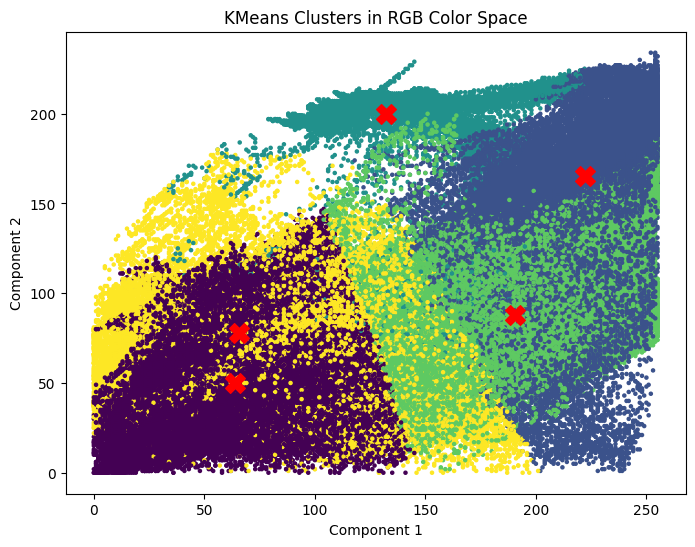

Inertia: 717496519.4415413
Silhouette Score: 0.42159624364312853


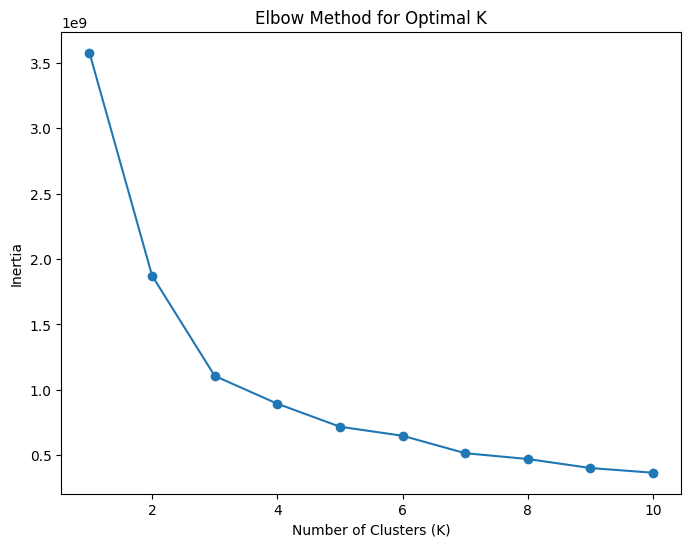

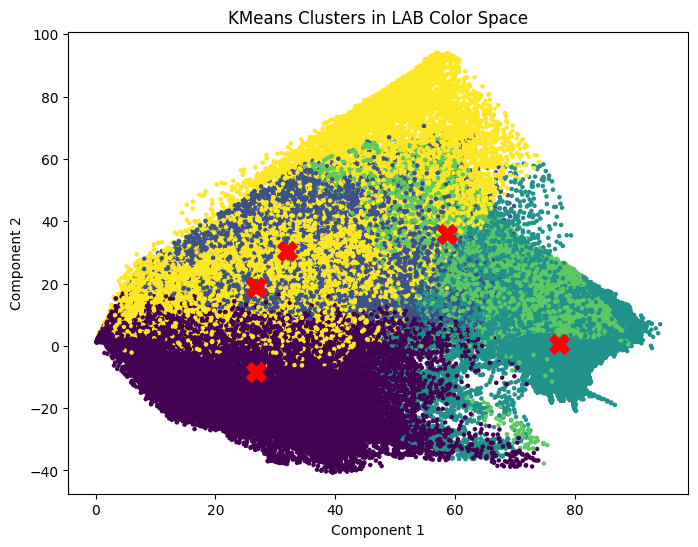

Inertia: 147397593.92669892
Silhouette Score: 0.35988590800791376


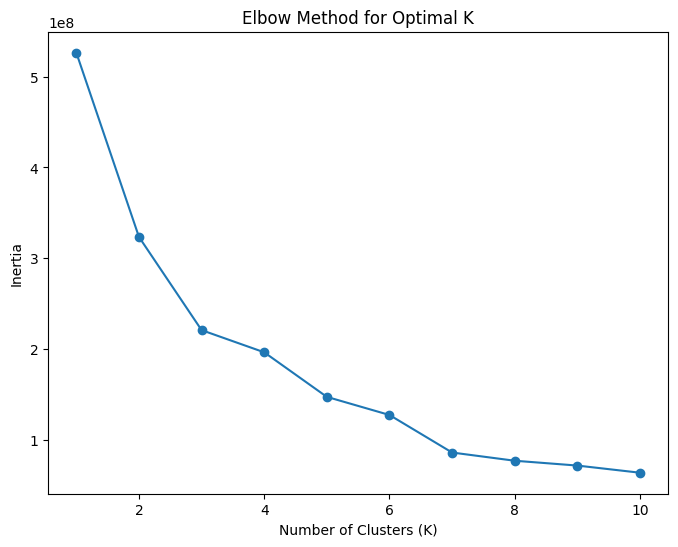

In [11]:
#Load image to your own path

image_path = "/content/Scenic_Image.jpeg"

#Load and preprocess the image

img_rgb = load_and_preprocess_image(image_path,color_space='rgb')

#KMeans Clustering in RGB Color Space

kmeans_rgb, labels_rgb, centers_rgb = kmeans_clustering(img_rgb,k=5)

plot_clusters(img_rgb,labels_rgb,centers_rgb,color_space='rgb')

#Performance Metrics for RGB Clustering

plot_performance_metrics(kmeans_rgb,img_rgb)

#Convert to LAB Color Space for 5D Clustering (Taking L, A, B and Extra Channels)

img_lab = load_and_preprocess_image(image_path, color_space='lab')

#KMeans Clustering in LAB Color Space

kmeans_lab, labels_lab, centers_lab = kmeans_clustering(img_lab,k=5)

plot_clusters(img_lab,labels_lab,centers_lab,color_space='lab')

#Performance Metrics for LAB Clustering

plot_performance_metrics(kmeans_lab,img_lab)


**Conclusion:**

K-Means effectively clusters image data in both 3D and 5D feature spaces.
5D clustering provides better segmentation by incorporating spatial information, leading to more meaningful object separation in images.
Increasing the feature dimensions enhances clustering performance but increases computational complexity.

Applications:

1. Image Segmentation: Used in medical imaging, autonomous driving, and object detection.
2. Compression & Denoising: Reducing image complexity by grouping similar pixels.
3. Anomaly Detection: Identifying outliers in images, such as defect detection in industrial quality control.
4. Feature Engineering: Enhancing feature selection for deep learning models.